# Structured and time series data

Using Jeremy Howard's notebook working on Rossman dataset - on a similar problem solving for sales prediction

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

In [4]:
import pickle

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/favorita/'

### TO BE EDITED

Feature Space:
* holidays and events: List of holidays in the country
* store: List of stores
* items: item types - perishable or not etc.
* oil: country fortune tied heavily to oil availability. oil prices are provided to help understand purchasing power
* train: training dataset
* test: test dataset
* transactions: provides the transaction information for some of the stores for the training period

In [108]:
table_names = ['holidays_events', 'items', 'oil', 'stores', 
               'test', 'train', 'transactions']

We'll be using the popular data manipulation framework `pandas`. Among other things, pandas allows you to manipulate tables/data frames in python as one would in a database.

We're going to go ahead and load all of our csv's as dataframes into the list `tables`.

In [10]:
holidays_events = pd.read_csv(f'{PATH}holidays_events.csv', low_memory = False)

In [11]:
items = pd.read_csv(f'{PATH}items.csv', low_memory = False)

In [12]:
oil = pd.read_csv(f'{PATH}oil.csv', low_memory = False)

In [13]:
stores = pd.read_csv(f'{PATH}stores.csv', low_memory = False)

In [14]:
transactions = pd.read_csv(f'{PATH}transactions.csv', low_memory = False)

In [15]:
test = pd.read_csv(f'{PATH}test.csv', low_memory = False)

In [16]:
train = pd.read_csv(f'{PATH}train.csv', low_memory = False)

In [17]:
train.shape

(125497040, 6)

In [18]:
test.shape

(3370464, 5)

Using only 10 million recordsbecause of memory issue. Can't use the whole 300 million records. that for a later day :)

In [19]:
train = train.sample(n = 10000000)

In [20]:
#test = test.sample (n = 200000)

In [21]:
train.to_pickle("f{PATH}train")

In [22]:
train = pd.read_pickle("f{PATH}train")

In [23]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [24]:
holidays_events[holidays_events.type == 'Transfer']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [25]:
holidays_events.type.value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [26]:
#tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [27]:
tables = [holidays_events, items, oil, stores, 
               test, train, transactions]

In [28]:
from IPython.display import HTML

In [29]:
for t in tables: display(t.head())

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
111229259,111229259,2017-04-02,50,1370025,1.0,False
19960135,19960135,2014-03-05,37,1047757,15.0,NaN
97951756,97951756,2016-11-25,21,1916209,1.0,False
82225311,82225311,2016-06-15,42,1489882,45.0,True
43526316,43526316,2015-03-25,5,982726,5.0,False


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


This is very representative of a typical industry dataset.

The following returns summarized aggregate information to each table accross each field.

In [27]:
for t in tables: display(DataFrameSummary(t).summary())

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338
counts,350,350,350,350,350,350
uniques,312,6,3,24,103,2
missing,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%
types,categorical,categorical,categorical,categorical,categorical,bool


,item_nbr,family,class,perishable
count,4100,NaN,4100,4100
mean,1.25144e+06,NaN,2169.65,0.240488
std,587687,NaN,1484.91,0.427432
min,96995,NaN,1002,0
25%,818111,NaN,1068,0
50%,1.3062e+06,NaN,2004,0
75%,1.90492e+06,NaN,2990.5,0
max,2.13424e+06,NaN,7780,1
counts,4100,4100,4100,4100
uniques,4100,33,337,2


,date,dcoilwtico
count,NaN,1175
mean,NaN,67.7144
std,NaN,25.6305
min,NaN,26.19
25%,NaN,46.405
50%,NaN,53.19
75%,NaN,95.66
max,NaN,110.62
counts,1218,1175
uniques,1218,998


,store_nbr,city,state,type,cluster
count,54,NaN,NaN,NaN,54
mean,27.5,NaN,NaN,NaN,8.48148
std,15.7321,NaN,NaN,NaN,4.69339
min,1,NaN,NaN,NaN,1
25%,14.25,NaN,NaN,NaN,4
50%,27.5,NaN,NaN,NaN,8.5
75%,40.75,NaN,NaN,NaN,13
max,54,NaN,NaN,NaN,17
counts,54,54,54,54,54
uniques,54,22,16,5,17


,id,date,store_nbr,item_nbr,onpromotion
count,3.37046e+06,NaN,3.37046e+06,3.37046e+06,NaN
mean,1.27182e+08,NaN,27.5,1.2448e+06,NaN
std,972969,NaN,15.5858,589836,NaN
min,1.25497e+08,NaN,1,96995,NaN
25%,1.2634e+08,NaN,14,805321,NaN
50%,1.27182e+08,NaN,27.5,1.29466e+06,NaN
75%,1.28025e+08,NaN,41,1.73002e+06,NaN
max,1.28868e+08,NaN,54,2.13424e+06,NaN
counts,3370464,3370464,3370464,3370464,3370464
uniques,3370464,16,54,3901,2


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
count,5e+07,NaN,5e+07,5e+07,5e+07,NaN
mean,6.27519e+07,NaN,27.4678,972885,8.55807,NaN
std,3.62296e+07,NaN,16.3299,520576,26.0379,NaN
min,0,NaN,1,96995,-15372,NaN
25%,3.13683e+07,NaN,12,522721,2,NaN
50%,6.27566e+07,NaN,28,959500,4,NaN
75%,9.41306e+07,NaN,43,1.35438e+06,9,NaN
max,1.25497e+08,NaN,54,2.12711e+06,89440,NaN
counts,50000000,50000000,50000000,50000000,50000000,41370092
uniques,50000000,1684,54,4034,174544,2


,date,store_nbr,transactions
count,NaN,83488,83488
mean,NaN,26.9392,1694.6
std,NaN,15.6082,963.287
min,NaN,1,5
25%,NaN,13,1046
50%,NaN,27,1393
75%,NaN,40,2079
max,NaN,54,8359
counts,83488,83488,83488
uniques,1682,54,4993


## Data Cleaning / Feature Engineering

As a structured data problem, we necessarily have to go through all the cleaning and feature engineering, even though we're using a neural network.

In [30]:
table_names

['holidays_events', 'items', 'oil', 'stores', 'test', 'train', 'transactions']

In [31]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [32]:
holidays_to_use = holidays_events[((holidays_events['type'] == 'Holiday') & (holidays_events['transferred'] == False)) | (holidays_events['type'] == 'Additional') | (holidays_events['type'] == 'Event') | (holidays_events['type'] == 'Bridge') | (holidays_events['type'] == 'Transfer')]

There are dates that are holidays due to multiple reasons. We need unique dates. And so creating a counter and picking only unique dates

In [33]:
holidays_to_use['holiday_counter'] = holidays_to_use.groupby('date').cumcount() + 1

holidays_unique = holidays_to_use[holidays_to_use.holiday_counter == 1]

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


not considering the difference between holiday types and only considering a holiday as a holiday

In [34]:
holidays_unique['holiday'] = 1

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Merging

In [35]:
train = pd.merge(train, holidays_unique[['date', 'holiday']], left_on = 'date', right_on = 'date', how = 'left')

train.holiday = train.holiday == 1

train= pd.merge(train, items, left_on='item_nbr', right_on = 'item_nbr', how = 'left')

train= pd.merge(train, oil, left_on='date', right_on='date' , how = 'left')

train= pd.merge(train, stores, left_on='store_nbr', right_on='store_nbr' , how = 'left')

train= pd.merge(train, transactions, left_on=['date','store_nbr'], right_on=['date','store_nbr'] , how = 'left')

transactions data isn't available for test dates. so, taking an average of transactions from training data and applying it to test transactions

In [36]:
test = pd.merge(test, holidays_unique[['date', 'holiday']], left_on = 'date', right_on = 'date', how = 'left')

test.holiday = test.holiday == 1

test= pd.merge(test, items, left_on='item_nbr', right_on = 'item_nbr', how = 'left')

test= pd.merge(test, oil, left_on='date', right_on='date' , how = 'left')

test= pd.merge(test, stores, left_on='store_nbr', right_on='store_nbr' , how = 'left')

test['transactions'] = train['transactions'].mean()

In [37]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,holiday,family,class,perishable,dcoilwtico,city,state,type,cluster,transactions
0,111229259,2017-04-02,50,1370025,1.0,False,False,HOME AND KITCHEN II,6338,0,NaN,Ambato,Tungurahua,A,14,3105.0
1,19960135,2014-03-05,37,1047757,15.0,NaN,False,BEVERAGES,1126,0,101.75,Cuenca,Azuay,D,2,1719.0
2,97951756,2016-11-25,21,1916209,1.0,False,True,GROCERY I,1026,0,46.72,Santo Domingo,Santo Domingo de los Tsachilas,B,6,1213.0
3,82225311,2016-06-15,42,1489882,45.0,True,False,PRODUCE,2018,1,47.92,Cuenca,Azuay,D,2,981.0
4,43526316,2015-03-25,5,982726,5.0,False,False,CLEANING,3018,0,48.75,Santo Domingo,Santo Domingo de los Tsachilas,D,4,1444.0


In [38]:
test.head()

,id,date,store_nbr,item_nbr,onpromotion,holiday,family,class,perishable,dcoilwtico,city,state,type,cluster,transactions
0,125497040,2017-08-16,1,96995,False,False,GROCERY I,1093,0,46.8,Quito,Pichincha,D,13,1880.574733
1,125497041,2017-08-16,1,99197,False,False,GROCERY I,1067,0,46.8,Quito,Pichincha,D,13,1880.574733
2,125497042,2017-08-16,1,103501,False,False,CLEANING,3008,0,46.8,Quito,Pichincha,D,13,1880.574733
3,125497043,2017-08-16,1,103520,False,False,GROCERY I,1028,0,46.8,Quito,Pichincha,D,13,1880.574733
4,125497044,2017-08-16,1,103665,False,False,BREAD/BAKERY,2712,1,46.8,Quito,Pichincha,D,13,1880.574733


Adding Date components

In [39]:
add_datepart(train, "date", drop=False)

In [40]:
add_datepart(test, "date", drop=False)

Next we'll fill in missing values to avoid complications with `NA`'s. `NA` (not available) is how Pandas indicates missing values; many models have problems when missing values are present, so it's always important to think about how to deal with them. In these cases, we are picking an arbitrary *signal value* that doesn't otherwise appear in the data.

In [41]:
train.onpromotion = train.onpromotion.fillna(False)

In [42]:
test.onpromotion = test.onpromotion.fillna(False)

In [43]:
train["dcoilwtico"] = train.groupby(['Year', 'Month'])['dcoilwtico'].transform(lambda x: x.fillna(x.mean()))

In [44]:
test["dcoilwtico"] = test.groupby(['Year', 'Month'])['dcoilwtico'].transform(lambda x: x.fillna(x.mean()))

In [45]:
train["transactions"] = train.groupby(['store_nbr','Year', 'Month'])['transactions'].transform(lambda x: x.fillna(x.mean()))

Making 1s and 0s to boolean for easy understanding

In [46]:
train.perishable = train.perishable == 1

In [47]:
test.perishable = test.perishable == 1

In [50]:
display(DataFrameSummary(train).summary())

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,holiday,family,class,perishable,dcoilwtico,city,state,type,cluster,transactions,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
count,5e+06,NaN,5e+06,5e+06,5e+06,NaN,NaN,NaN,5e+06,NaN,5e+06,NaN,NaN,NaN,5e+06,5e+06,5e+06,5e+06,5e+06,5e+06,5e+06,5e+06,NaN,NaN,NaN,NaN,NaN,NaN,5e+06
mean,6.27777e+07,NaN,27.4614,973062,8.56714,NaN,NaN,NaN,1963.48,NaN,61.255,NaN,NaN,NaN,8.72787,1881.44,2015.22,6.33599,25.7201,15.5989,3.04188,177.305,NaN,NaN,NaN,NaN,NaN,NaN,1.44237e+09
std,3.6227e+07,NaN,16.3302,520767,24.1014,NaN,NaN,NaN,1150.52,NaN,23.6749,NaN,NaN,NaN,4.62701,1037.93,1.2991,3.39323,14.8446,8.81779,2.01854,103.642,NaN,NaN,NaN,NaN,NaN,NaN,4.01473e+07
min,7,NaN,1,96995,-1806,NaN,NaN,NaN,1002,NaN,26.19,NaN,NaN,NaN,1,5,2013,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.357e+09
25%,3.14162e+07,NaN,12,522721,2,NaN,NaN,NaN,1050,NaN,45.37,NaN,NaN,NaN,4,1157,2014,3,13,8,1,88,NaN,NaN,NaN,NaN,NaN,NaN,1.41126e+09
50%,6.2802e+07,NaN,28,959500,4,NaN,NaN,NaN,1190,NaN,49.85,NaN,NaN,NaN,9,1551,2015,6,25,15,3,175,NaN,NaN,NaN,NaN,NaN,NaN,1.44815e+09
75%,9.41388e+07,NaN,43,1.35438e+06,9,NaN,NaN,NaN,2712,NaN,91.23,NaN,NaN,NaN,13,2387,2016,9,38,23,5,264,NaN,NaN,NaN,NaN,NaN,NaN,1.47666e+09
max,1.25497e+08,NaN,54,2.12711e+06,16000,NaN,NaN,NaN,7780,NaN,110.62,NaN,NaN,NaN,17,8359,2017,12,53,31,6,366,NaN,NaN,NaN,NaN,NaN,NaN,1.50276e+09
counts,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000
uniques,5000000,1684,54,4014,64065,2,2,33,330,2,1050,22,16,5,17,5054,5,12,53,31,7,366,2,2,2,2,2,2,1684


## Durations

In [51]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,holiday,family,class,perishable,dcoilwtico,city,state,type,cluster,transactions,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,28564477,2014-08-05,17,859932,1.0,False,True,CLEANING,3022,False,97.340000,Quito,Pichincha,C,12,1335.0,2014,8,32,5,1,217,False,False,False,False,False,False,1407196800
1,42321567,2015-03-05,31,1047695,2.0,False,False,BEVERAGES,1122,False,50.760000,Babahoyo,Los Rios,B,10,1457.0,2015,3,10,5,3,64,False,False,False,False,False,False,1425513600
2,43343002,2015-03-22,8,164647,3.0,False,False,CLEANING,3032,False,47.838941,Quito,Pichincha,D,8,2728.0,2015,3,12,22,6,81,False,False,False,False,False,False,1426982400
3,120857538,2017-07-02,46,1975514,25.0,False,False,GROCERY I,1034,False,46.612852,Quito,Pichincha,A,14,4940.0,2017,7,26,2,6,183,False,False,False,False,False,False,1498953600
4,42314339,2015-03-05,24,302952,4.0,False,False,BREAD/BAKERY,2712,True,50.760000,Guayaquil,Guayas,D,1,2310.0,2015,3,10,5,3,64,False,False,False,False,False,False,1425513600


In [52]:
test.head()

,id,date,store_nbr,item_nbr,onpromotion,holiday,family,class,perishable,dcoilwtico,city,state,type,cluster,transactions,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,125763389,2017-08-17,15,849139,False,False,DAIRY,2124,True,47.07,Ibarra,Imbabura,C,15,1881.613335,2017,8,33,17,3,229,False,False,False,False,False,False,1502928000
1,128855445,2017-08-31,51,2017257,False,False,PERSONAL CARE,4138,False,47.26,Guayaquil,Guayas,A,17,1881.613335,2017,8,35,31,3,243,True,False,False,False,False,False,1504137600
2,128566565,2017-08-30,31,1997781,False,False,CLEANING,3010,False,45.96,Babahoyo,Los Rios,B,10,1881.613335,2017,8,35,30,2,242,False,False,False,False,False,False,1504051200
3,128755960,2017-08-31,26,1114903,False,False,CLEANING,3034,False,47.26,Guayaquil,Guayas,D,10,1881.613335,2017,8,35,31,3,243,True,False,False,False,False,False,1504137600
4,128331316,2017-08-29,25,1373944,False,False,HOME AND KITCHEN II,6328,False,46.46,Salinas,Santa Elena,D,1,1881.613335,2017,8,35,29,1,241,False,False,False,False,False,False,1503964800


In [53]:
train.shape

(5000000, 29)

In [54]:
test.shape

(200000, 28)

## Create features

In [55]:
train.to_pickle('f{PATH}train')

In [9]:
train = pd.read_pickle('f{PATH}train')

In [56]:
test.to_pickle('f{PATH}test')

In [10]:
test = pd.read_pickle('f{PATH}test')

In [46]:
train.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'holiday', 'family', 'class', 'perishable', 'dcoilwtico', 'city',
       'state', 'type', 'cluster', 'transactions', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed'],
      dtype='object')

In [47]:
test.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'onpromotion', 'holiday',
       'family', 'class', 'perishable', 'dcoilwtico', 'city', 'state', 'type',
       'cluster', 'transactions', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'],
      dtype='object')

In [59]:
train.head().T.head(40)

,0,1,2,3,4
id,28564477,42321567,43343002,120857538,42314339
date,2014-08-05 00:00:00,2015-03-05 00:00:00,2015-03-22 00:00:00,2017-07-02 00:00:00,2015-03-05 00:00:00
store_nbr,17,31,8,46,24
item_nbr,859932,1047695,164647,1975514,302952
unit_sales,1,2,3,25,4
onpromotion,False,False,False,False,False
holiday,True,False,False,False,False
family,CLEANING,BEVERAGES,CLEANING,GROCERY I,BREAD/BAKERY
class,3022,1122,3032,1034,2712
perishable,False,False,False,False,True


In [60]:
test.head().T.head(40)

,0,1,2,3,4
id,125763389,128855445,128566565,128755960,128331316
date,2017-08-17 00:00:00,2017-08-31 00:00:00,2017-08-30 00:00:00,2017-08-31 00:00:00,2017-08-29 00:00:00
store_nbr,15,51,31,26,25
item_nbr,849139,2017257,1997781,1114903,1373944
onpromotion,False,False,False,False,False
holiday,False,False,False,False,False
family,DAIRY,PERSONAL CARE,CLEANING,CLEANING,HOME AND KITCHEN II
class,2124,4138,3010,3034,6328
perishable,True,False,False,False,False
dcoilwtico,47.07,47.26,45.96,47.26,46.46


Now that we've engineered all our features, we need to convert to input compatible with a neural network.

This includes converting categorical variables into contiguous integers or one-hot encodings, normalizing continuous features to standard normal, etc...

In [48]:
cat_vars = ['store_nbr', 'item_nbr', 'onpromotion', 'holiday','family', 'class',
    'perishable', 'city', 'state', 'type', 'cluster', 'Year',
    'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

contin_vars = ['dcoilwtico', 'transactions', 'Elapsed']

n = len(train); n

10000000

In [49]:
dep = 'unit_sales'
train = train[cat_vars+contin_vars+[dep, 'date']].copy()

In [50]:
test[dep] = 0
test = test[cat_vars+contin_vars+[dep, 'date', 'id']].copy()

In [51]:
for v in cat_vars: train[v] = train[v].astype('category').cat.as_ordered()

In [52]:
apply_cats(test, train)

In [53]:
for v in contin_vars:
    train[v] = train[v].astype('float32')
    test[v] = test[v].astype('float32')

We're going to run on a sample.

In [54]:
# idxs = get_cv_idxs(n, val_pct=3000000/n)
# train_samp = train.iloc[idxs].set_index("date")
# samp_size = len(train_samp); samp_size

To run on the full dataset, use this instead:

In [55]:
samp_size = n
train_samp = train.set_index("date")

We can now process our data...

In [56]:
train_samp.head(2)

,store_nbr,item_nbr,onpromotion,holiday,family,class,perishable,city,state,type,cluster,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,dcoilwtico,transactions,Elapsed,unit_sales
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-02,50,1370025,False,False,HOME AND KITCHEN II,6338,False,Ambato,Tungurahua,A,14,2017,4,13,2,6,92,False,False,False,False,False,False,51.053837,3105.0,1.491091e+09,1.0
2014-03-05,37,1047757,False,False,BEVERAGES,1126,False,Cuenca,Azuay,D,2,2014,3,10,5,2,64,False,False,False,False,False,False,101.750000,1719.0,1.393978e+09,15.0


There are some cases with negative sales - probably returns. Moving them to a value of '1' to allow for defined logarithms (since log(0) is not defined)

In [57]:
train_samp['unit_sales'] = np.where(train_samp.unit_sales > 0, train_samp.unit_sales, 1 )

In [59]:
df, y, nas, mapper = proc_df(train_samp, 'unit_sales', do_scale=True)
y1 = np.log(y)

In [60]:
test = test.set_index("date")

In [61]:
df_test, _, nas, mapper = proc_df(test, 'unit_sales', do_scale=True, skip_flds=['id'],
                                  mapper=mapper, na_dict=nas)

In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail in [this post](http://www.fast.ai/2017/11/13/validation-sets/) fastai website.

One approach is to take the last 25% of rows (sorted by date) as our validation set.

In [63]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

An even better option for picking a validation set is using the exact same length of time period as the test set uses - this is implemented here:

In [64]:
# val_idx = np.flatnonzero(
#     (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))

# val_idx=[0]

## DL

We're ready to put together our models.

Root-mean-squared percent error is the metric Kaggle used for this competition.

In [65]:
train.head()

,store_nbr,item_nbr,onpromotion,holiday,family,class,perishable,city,state,type,cluster,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,dcoilwtico,transactions,Elapsed,unit_sales,date
0,50,1370025,False,False,HOME AND KITCHEN II,6338,False,Ambato,Tungurahua,A,14,2017,4,13,2,6,92,False,False,False,False,False,False,51.053837,3105.0,1.491091e+09,1.0,2017-04-02
1,37,1047757,False,False,BEVERAGES,1126,False,Cuenca,Azuay,D,2,2014,3,10,5,2,64,False,False,False,False,False,False,101.750000,1719.0,1.393978e+09,15.0,2014-03-05
2,21,1916209,False,True,GROCERY I,1026,False,Santo Domingo,Santo Domingo de los Tsachilas,B,6,2016,11,47,25,4,330,False,False,False,False,False,False,46.720001,1213.0,1.480032e+09,1.0,2016-11-25
3,42,1489882,True,False,PRODUCE,2018,True,Cuenca,Azuay,D,2,2016,6,24,15,2,167,False,False,False,False,False,False,47.919998,981.0,1.465949e+09,45.0,2016-06-15
4,5,982726,False,False,CLEANING,3018,False,Santo Domingo,Santo Domingo de los Tsachilas,D,4,2015,3,13,25,2,84,False,False,False,False,False,False,48.750000,1444.0,1.427242e+09,5.0,2015-03-25


Define a function to check the metrics. This should be the function based on which the loss is evaluated. It's unique to every competition and is also unique to the Corporacion Favorita competition. The function below isn't correct.

In [27]:
# def inv_y(a): return np.exp(a)

# def exp_rmspe(y_pred, targ):
#     targ = inv_y(targ)
#     pct_var = (targ - inv_y(y_pred))/targ
#     return math.sqrt((pct_var**2).mean())

# max_log_y = np.max(yl)
# y_range = (0, max_log_y*1.2)

This should be a part of the metrics function defined above. We can define it later, use y_range as of now as below

In [67]:
max_log_y = np.max(y1)
y_range = (0, np.max(y1)*1.2)

In [68]:
y_range

(0, 12.834200386992384)

We can create a ModelData object directly from out data frame.

In [69]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y1.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

In [70]:
cat_sz = [(c, len(train_samp[c].cat.categories)+1) for c in cat_vars]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [72]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [77]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

  2%|▏         | 1214/58594 [00:30<23:38, 40.47it/s, loss=0.646]

In [78]:
m.lr_find()

 61%|██████    | 35575/58594 [06:00<03:53, 98.79it/s, loss=3.34]  

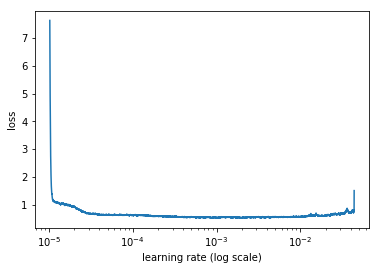

In [79]:
m.sched.plot(100)

### Training

In [82]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [83]:
m.fit(lr, 1) #could also use a metrics argument. The one defined for the Rossman dataset is metrics=[exp_rmspe]

KeyboardInterrupt: 

### All - Didn't do all this because of memory issues. Could only run a few iterations unlike the 20 odd below

In [94]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [95]:
m.fit(lr, 1, metrics=[exp_rmspe])

A Jupyter Widget

[ 0.       0.01456  0.01544  0.1148 ]                            



In [93]:
m.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.01418  0.02066  0.12765]                           
[ 1.       0.01081  0.01276  0.11221]                           
[ 2.       0.00976  0.01233  0.10987]                            



In [94]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.00801  0.01081  0.09899]                            
[ 1.       0.00714  0.01083  0.09846]                            
[ 2.       0.00707  0.01088  0.09878]                            



### Test

In [185]:
# m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
#                    0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
# lr = 1e-3

# m.fit(lr, 3, metrics=[exp_rmspe])

# m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

Saving Model

In [84]:
m.save('val0')

m.load('val0')

In [86]:
# x,y=m.predict_with_targs()

# #exp_rmspe(x,y)

KeyboardInterrupt: 

### Predicting

In [87]:
pred_test=m.predict(True)

In [88]:
pred_test = np.exp(pred_test)

In [102]:
test['unit_sales']=pred_test

In [104]:
csv_fn=f'{PATH}tmp/sub.csv'

In [106]:
test[['id','unit_sales']].to_csv(csv_fn, index=False)

In [107]:
FileLink(csv_fn)

/home/paperspace/fastai/courses/dl1/data/favorita/tmp/sub.csv

## RF

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, yl)

In [103]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [104]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_, exp_rmspe(preds, y_val)

(0.98086411192483902,
 0.92614447508562714,
 0.9193358549649463,
 0.11557443993375387)